# APPLIED DATA ANALYSIS ASSIGNMENT III

## QUESTION 3 FROM CH. 6:

### As we increase s from 0,

#### a) Training RSS will:

My answer to this question is "IV) Steadily Decrease". Since, we are flexing the boundry, coefficients can take any values to this will cause the overfitting and as outcome to this situation, we will have lower training rss until it hit almost 0. 

#### b) Test RSS will:

My answer to this question is "II) Decrease initially, and then eventually start increasing in a U shape.". As I mentioned above, we are making the model more and more flexible, due to fact that we are starting from 0, at first model will be better at test set beacuse of the flexibility but as much as we let it be more flexible, it will start to be overfitting the data so this will make the test rss decrease at first and then increase.

#### c) Variance will:

My answer to this question is "IV) Steadily Decrease". As it is mentioned above in part a, we let the model be more flexible with flexing the coefficients. Thus, model becomes more and more flexible and this will cause more and more variance.

#### d) Squared bias will:

My answer to this question is "iv. Steadily decrease". As it is mentioned above in part a, we let the model be more flexible with flexing the coefficients. As a result, bias will decrease steadily. 

#### e) Irreducible error will:

My answer to this question is "v. Remain constant". Flexiblity of model will not affect the irreducible error.

## QUESTION 8 FROM CH. 6:

### In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

#### (a) Use the rnorm() function to generate a predictor X of length rnorm() n = 100, as well as a noise vector e (error) of length n = 100.

In [37]:
import numpy as np
np.random.seed(1)

In [38]:
x = np.random.rand(100)

In [39]:
e = np.random.rand(100)

### (b) Generate a response vector Y of length n = 100 according to the model Y = ß0 + ß1X +ß2X^2 + ß3X^3 + e, where ß0, ß1, ß2 and ß3 are constants of your choice.

In [144]:
# Let's say ß0, ß1, ß2 and ß3 are items of c respectively
c = [10,8,5,-20] 
y = []
for i in range(100):
    X = x[i]
    E = e[i]
    Y = c[0]+(c[1]*X)+(c[2]*(X**2)+(c[3]*(X**3)))+2*E
    y.append(Y)
y = np.asarray(y)
# I multiplied error with 2 to to have more interesting data set

### c)

In [145]:
import pandas as pd

In [146]:
df = pd.DataFrame({"x":x,"y":y})

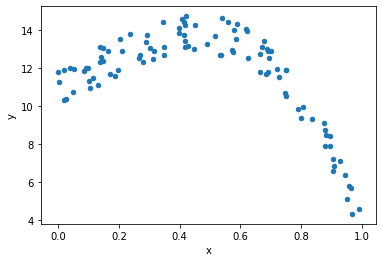

In [147]:
df.plot("x","y","scatter")

### d)

## QUESTION 1 FROM CH. 7:

### a)

Since f(x) and f1(x) functions are equal for all x<e, then we will can say a,b,c and d are equal to b0,b1,b2,b3 respectively.

### b)

### c)

### d)

### e)

## QUESTION 8 FROM CH. 7:

### Fit some of the non-linear models investigated in this chapter to the Auto data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

In [162]:
df = pd.read_csv("Auto.csv")
df = pd.DataFrame(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CCA34FB48>,
      dtype=object)

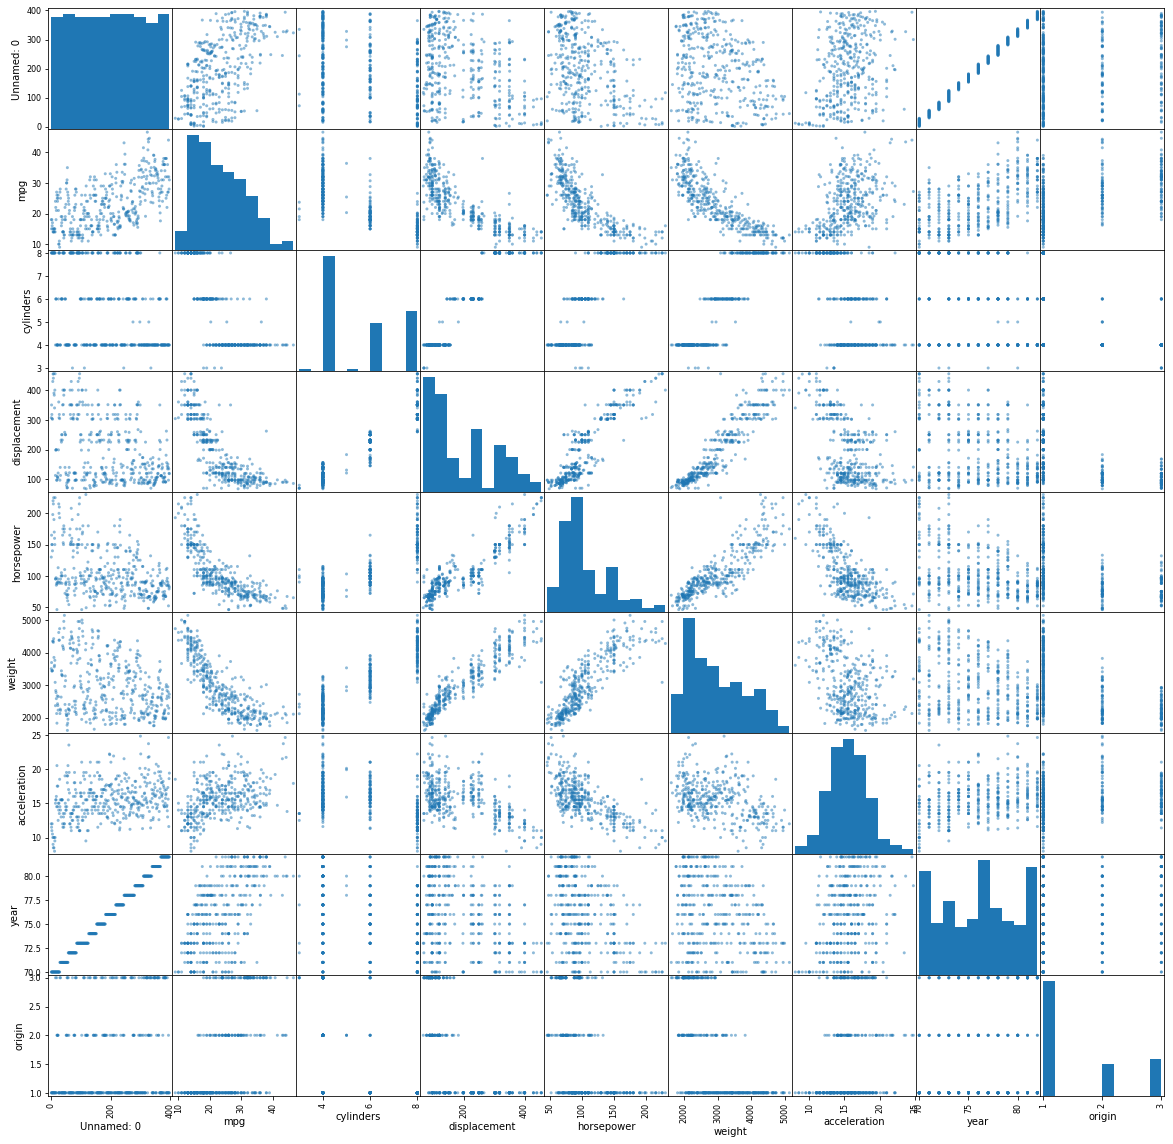

In [174]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(20, 20))

! COMMENT: From the scatter matrix as I see, mpg has some polynomial relations with other variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CD2E4AEC8>,
      dtype=object)

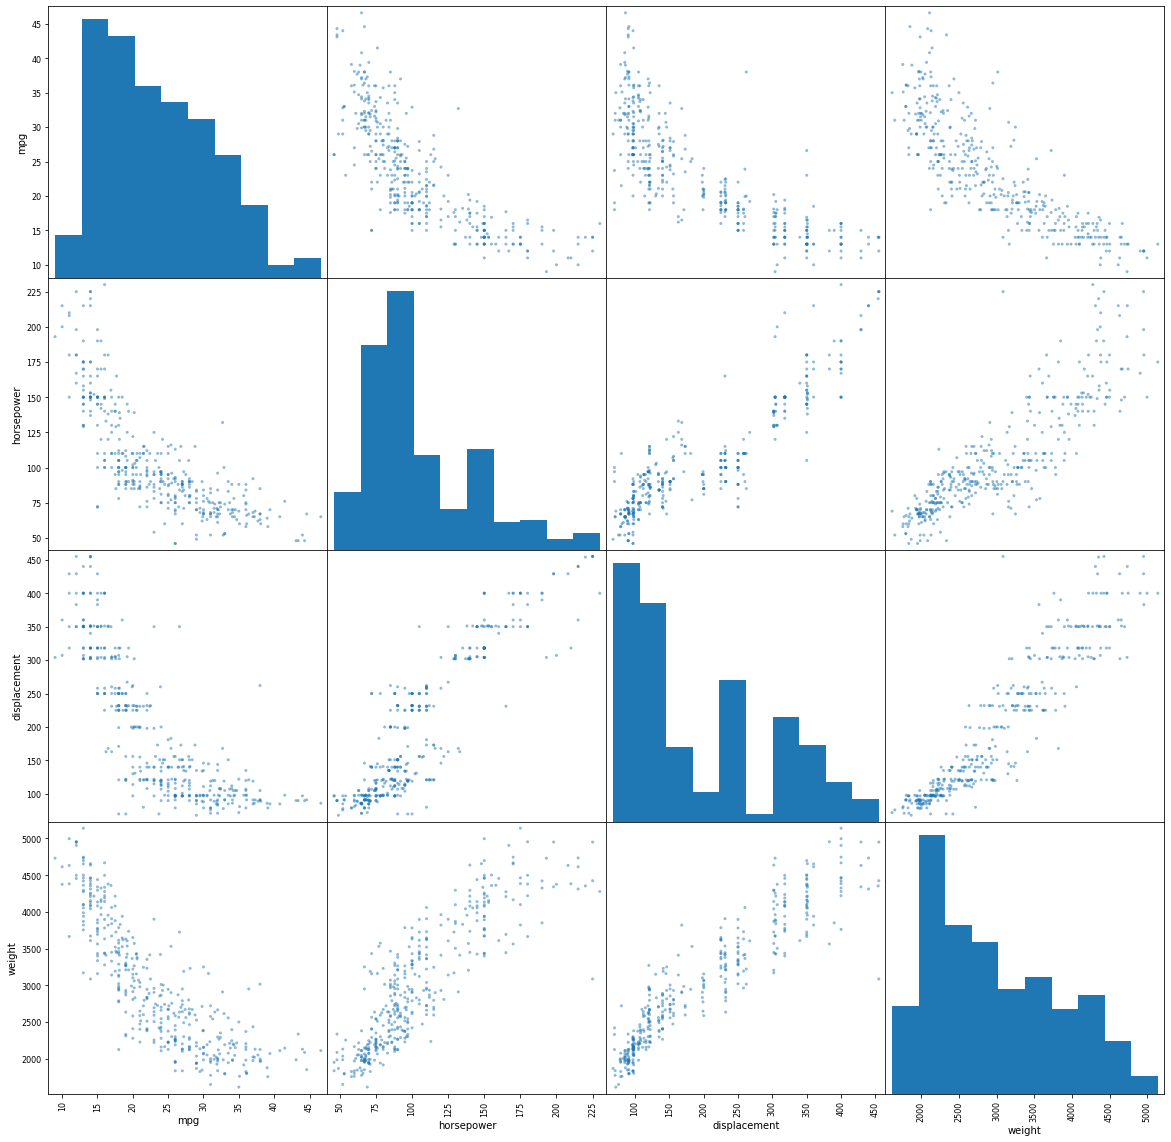

In [185]:
# to see these relations better
pd.plotting.scatter_matrix(df[["mpg","horsepower","displacement","weight"]], alpha=0.5, figsize=(20, 20))

In [316]:
# lets check and compare linear and polynomial models between mpg and displacement.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_mpg_displacement = pd.DataFrame(df[["mpg","displacement"]])

In [317]:
x = df_mpg_displacement[["mpg"]]
y = df_mpg_displacement[["displacement"]]

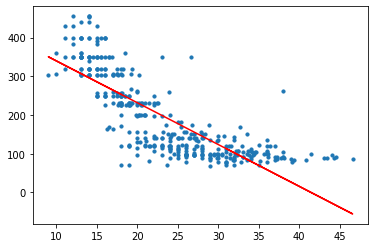

In [318]:
l_model = LinearRegression()
l_model.fit(x, y)
y_pred = l_model.predict(x)
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [319]:
r2_score(y, y_pred)

0.6482294003193045

In [320]:
# as we can see linear model is not doing the best! r2 is 0.64. lets try polynomial regression!
from sklearn.preprocessing import PolynomialFeatures
import operator
X = [float(i[0]) for i in x.to_numpy()]
X = np.asarray(X)
Y = [float(i[0]) for i in y.to_numpy()]
Y = np.asarray(Y)

In [321]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

0.7763177510218131


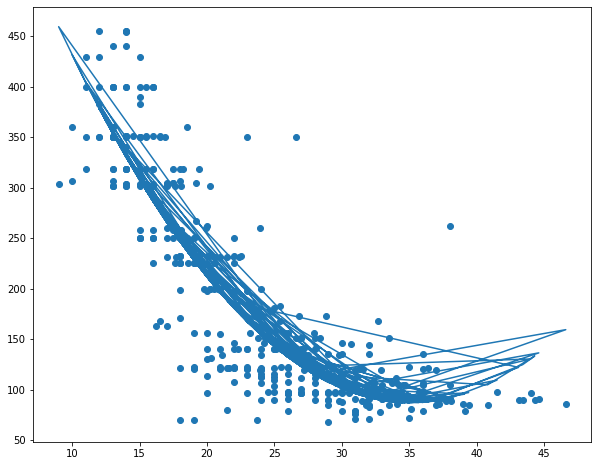

In [323]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y.reshape(-1, 1))
Y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, Y);
plt.plot(X, Y_pred);
print(r2_score(Y, Y_pred))

! COMMENT: As we can see, r2 score is higher so we can say polynomial regression is better way to describe the relation.

## QUESTION 6 FROM CH. 7:

### In this exercise, you will further analyze the Wage data set considered throughout this chapter.

### a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial.What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

In [325]:
data = pd.read_csv("Wage.csv")
df = pd.DataFrame(data)

In [332]:
x = np.asarray([i for i in df.age])
y = np.asarray([i for i in df.wage])

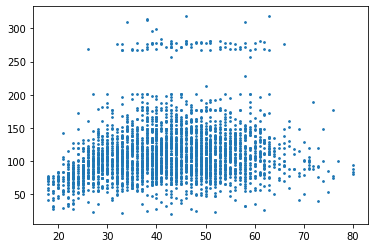

In [336]:
plt.scatter(x, y, s=3)
plt.show()

In [346]:
poly_reg2 = PolynomialFeatures(degree=2)
A_poly = poly_reg2.fit_transform(x.reshape(-1, 1))

In [347]:
lin_reg = LinearRegression()
lin_reg.fit(A_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(A_poly)

In [348]:
y,y_pred

(array([ 75.04315402,  70.47601965, 130.98217738, ...,  66.22940829,
         87.98103279,  90.48191336]), array([[246.76135723],
        [154.30655518],
        [140.6758335 ],
        ...,
        [122.83920584],
        [122.83920584],
        [303.65227381]]))